In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='gpt2'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'g':[]}

In [4]:
gamma = [2,4,8,16]
lr = 5.0e-5

for g in gamma:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, focal loss gamma {g}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       focalloss=True,
                                                       gamma=g,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search gpt2, learning rate 5e-05, focal loss gamma 2


Map:   0%|          | 0/1796 [00:00<?, ? examples/s]

Map:   0%|          | 0/256 [00:00<?, ? examples/s]

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.7956	Val Loss:	0.6497	Accuracy:	0.6674	F1:	0.5422
2 / 30: Train Loss:	0.3607	Val Loss:	0.6472	Accuracy:	0.6893	F1:	0.6184
3 / 30: Train Loss:	0.3361	Val Loss:	0.6037	Accuracy:	0.7921	F1:	0.6832
4 / 30: Train Loss:	0.3166	Val Loss:	0.5878	Accuracy:	0.8074	F1:	0.7204
5 / 30: Train Loss:	0.3024	Val Loss:	0.5690	Accuracy:	0.8031	F1:	0.7199
6 / 30: Train Loss:	0.2876	Val Loss:	0.5759	Accuracy:	0.7637	F1:	0.7056
7 / 30: Train Loss:	0.2678	Val Loss:	0.5635	Accuracy:	0.7899	F1:	0.7357
8 / 30: Train Loss:	0.2644	Val Loss:	0.5453	Accuracy:	0.7812	F1:	0.7247
9 / 30: Train Loss:	0.2466	Val Loss:	0.5391	Accuracy:	0.7790	F1:	0.7340
10 / 30: Train Loss:	0.2303	Val Loss:	0.6126	Accuracy:	0.6718	F1:	0.6542
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.59      0.65      0.62       119
      struct       0.87      0.84      0.86       338

    accuracy               

Map:   0%|          | 0/256 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.4969	Val Loss:	0.6756	Accuracy:	0.6258	F1:	0.5232
2 / 30: Train Loss:	0.1122	Val Loss:	0.6974	Accuracy:	0.5646	F1:	0.5408
3 / 30: Train Loss:	0.1012	Val Loss:	0.6766	Accuracy:	0.6499	F1:	0.6030
4 / 30: Train Loss:	0.0917	Val Loss:	0.6551	Accuracy:	0.7177	F1:	0.6305
5 / 30: Train Loss:	0.0914	Val Loss:	0.6393	Accuracy:	0.7527	F1:	0.6397
6 / 30: Train Loss:	0.0859	Val Loss:	0.6418	Accuracy:	0.7615	F1:	0.6843
7 / 30: Train Loss:	0.0790	Val Loss:	0.6267	Accuracy:	0.7899	F1:	0.7012
8 / 30: Train Loss:	0.0841	Val Loss:	0.5996	Accuracy:	0.7877	F1:	0.6307
9 / 30: Train Loss:	0.0831	Val Loss:	0.6114	Accuracy:	0.8074	F1:	0.7099
10 / 30: Train Loss:	0.0791	Val Loss:	0.6157	Accuracy:	0.8031	F1:	0.7236
11 / 30: Train Loss:	0.0740	Val Loss:	0.6237	Accuracy:	0.7724	F1:	0.7137
12 / 30: Train Loss:	0.0724	Val Loss:	0.6063	Accuracy:	0.7943	F1:	0.7186
13 / 30: Train Loss:	0.0716	Val Loss:	0.5961	Accuracy:	0.8074	F1:	0.7298
14 / 30: Train Loss:	0.0672	Val Loss:	0.5984	Accuracy:	0.792

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.3107	Val Loss:	0.7950	Accuracy:	0.3239	F1:	0.3036
2 / 30: Train Loss:	0.0171	Val Loss:	0.7663	Accuracy:	0.3326	F1:	0.3166
3 / 30: Train Loss:	0.0139	Val Loss:	0.7454	Accuracy:	0.3720	F1:	0.3666
4 / 30: Train Loss:	0.0108	Val Loss:	0.7350	Accuracy:	0.4026	F1:	0.4004
5 / 30: Train Loss:	0.0111	Val Loss:	0.7424	Accuracy:	0.3611	F1:	0.3510
6 / 30: Train Loss:	0.0099	Val Loss:	0.7143	Accuracy:	0.4486	F1:	0.4478
7 / 30: Train Loss:	0.0085	Val Loss:	0.7013	Accuracy:	0.5252	F1:	0.5131
8 / 30: Train Loss:	0.0089	Val Loss:	0.7205	Accuracy:	0.3961	F1:	0.3942
9 / 30: Train Loss:	0.0085	Val Loss:	0.7047	Accuracy:	0.4967	F1:	0.4918
10 / 30: Train Loss:	0.0081	Val Loss:	0.7025	Accuracy:	0.5033	F1:	0.4982
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.32      0.71      0.44       119
      struct       0.82      0.46      0.59       338

    accuracy               

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.2083	Val Loss:	0.8163	Accuracy:	0.3348	F1:	0.3174
2 / 30: Train Loss:	0.0020	Val Loss:	0.8206	Accuracy:	0.3020	F1:	0.2725
3 / 30: Train Loss:	0.0016	Val Loss:	0.7992	Accuracy:	0.3260	F1:	0.3042
4 / 30: Train Loss:	0.0009	Val Loss:	0.7864	Accuracy:	0.3304	F1:	0.3139
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.27      0.95      0.43       119
      struct       0.87      0.12      0.21       338

    accuracy                           0.33       457
   macro avg       0.57      0.53      0.32       457
weighted avg       0.71      0.33      0.27       457

test results:
              precision    recall  f1-score   support

       bknow       0.27      0.90      0.42        67
      struct       0.79      0.14      0.24       189

    accuracy                           0.34       256
   macro avg       0.53      0.52      0.33       256
weighted av

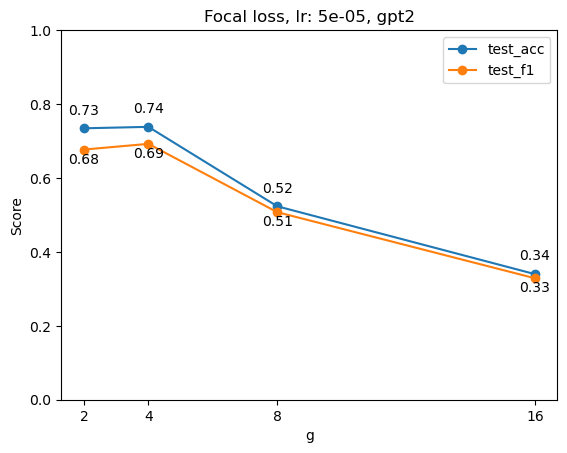

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Focal loss, lr: {lr}, {model_checkpoint}',
                        column='g',
                        sci_format=False)

In [6]:
%reset -f